In [518]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [519]:
PATH = os.getcwd()

TRAIN_PATH = os.path.join(PATH, 'customer_segmentation.csv')

df = pd.read_csv(TRAIN_PATH)

In [520]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


# miss value

In [522]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [523]:
# convert missing values to 'MSS' for visualization
df = df.fillna('MSS')

In [524]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [525]:
# columns contain MSS value
col_MSS = ['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']

C:\Users\Wan Roslini\AppData\Local\Temp\ipykernel_6100\2725820774.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Wan Roslini\AppData\Local\Temp\ipykernel_6100\2725820774.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Wan Roslini\AppData\Local\Temp\ipykernel_6100\2725820774.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Wan Roslini\AppData\Local\Temp\ipykernel_6100\2725820774.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Wan Roslini\AppData\Local\Temp\ipykernel_6100\2725820774.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


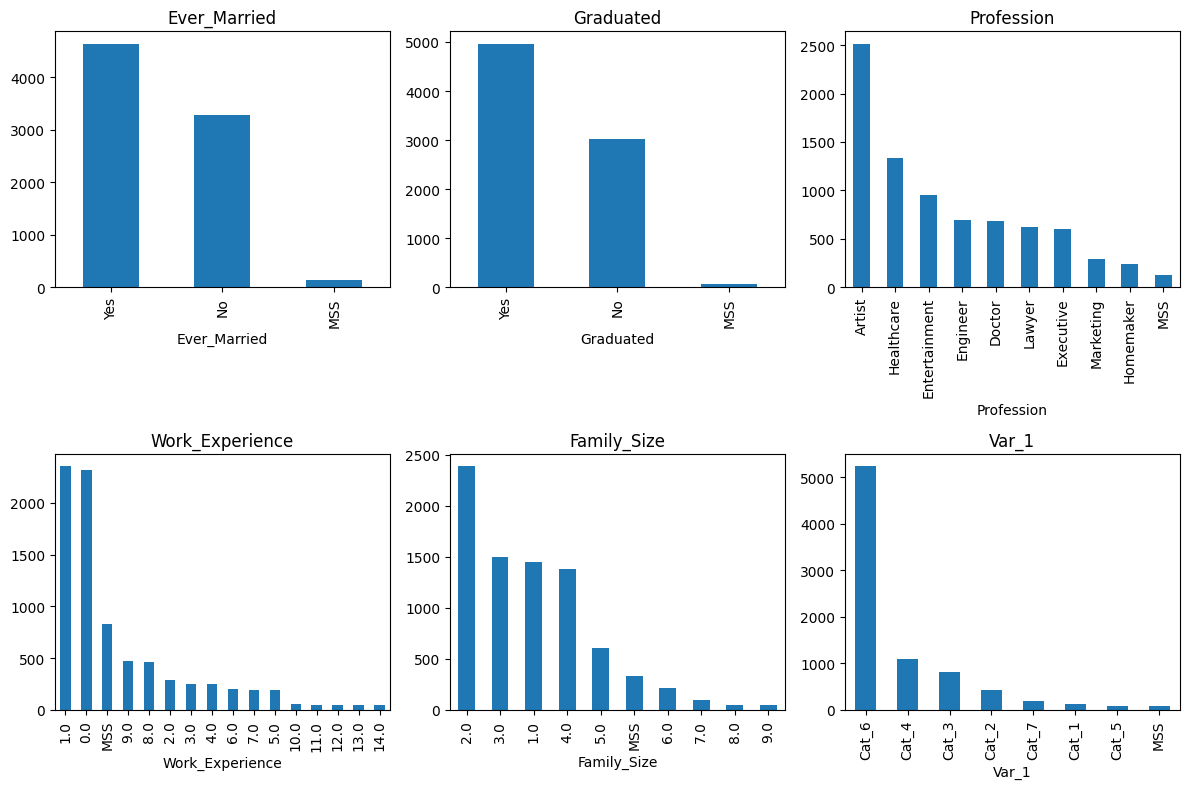

In [526]:
# Create subplots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(col_MSS, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    df[column].value_counts().plot(kind='bar', title=column)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

In [527]:
# Replace 'MSS' with np.NaN
df['Ever_Married'] = df['Ever_Married'].replace('MSS', np.NaN)
df['Graduated'] = df['Graduated'].replace('MSS', np.NaN)
df['Var_1'] = df['Var_1'].replace('MSS', np.NaN)

In [528]:
# dealing with missing values from the visualization
# 1. fill missing values with forward fill
df['Ever_Married'].fillna(method ='ffill', inplace=True)
df['Graduated'].fillna(method ='ffill', inplace=True)
df['Var_1'].fillna(method ='ffill', inplace=True)

In [529]:
# Replace 'MSS' with np.NaN for Profession
df['Profession'] = df['Profession'].replace('MSS', np.NaN)

In [530]:
# dealing with missing values from the visualization
# 2. drop NA in Profession
df = df.dropna(subset=['Profession'])

In [531]:
# Replace 'MSS' with np.NaN for Work_Experience, Family_Size
df['Work_Experience'] = df['Work_Experience'].replace('MSS', np.NaN)
df['Family_Size'] = df['Family_Size'].replace('MSS', np.NaN)

In [532]:
# dealing with missing values from the visualization
# 3. Replace 'MSS' with np.NaN for Work_Experience, Family_Size
df['Work_Experience'] = df['Work_Experience'].replace(np.NaN, df['Work_Experience'].median())
df['Family_Size'] = df['Family_Size'].replace(np.NaN, df['Family_Size'].median())

In [533]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

# label encoder

In [534]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [535]:
# label encoder
# Convert labels into numerical form (label encoding)
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']

encoder = LabelEncoder()

# Iterate through the columns and perform label encoding
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column].values)

In [536]:
# Mapping method in label encoding for column Spending_Score
map_spend = {'Low': 0, 'Average': 1, 'High': 2}

# Apply the mapping to the column
df['Spending_Score'] = df['Spending_Score'].map(map_spend)

In [537]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,0,4.0,3,D
1,462643,0,1,38,1,2,1.0,1,3.0,3,A
2,466315,0,1,67,1,2,1.0,0,1.0,5,B
3,461735,1,1,67,1,7,0.0,2,2.0,5,B
4,462669,0,1,40,1,3,1.0,2,6.0,5,A


In [538]:
#return the sum of uniques values in each column
df.nunique()

ID                 7944
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

# drop column

In [539]:
# drop id because useless
df = df.drop(columns=['ID'])

In [540]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,0,4.0,3,D
1,0,1,38,1,2,1.0,1,3.0,3,A
2,0,1,67,1,2,1.0,0,1.0,5,B
3,1,1,67,1,7,0.0,2,2.0,5,B
4,0,1,40,1,3,1.0,2,6.0,5,A


# Mapping - not use

In [188]:
# Mapping method in label encoding for column Gender
# map_gen = {'Male': 1, 'Female': 0}

# # Apply the mapping to the column
# df['Gender'] = df['Gender'].map(map_gen)

In [189]:
# Mapping method in label encoding for column Ever_Married, Graduated
# map_yesno = {'Yes': 1, 'No': 0}

# # Apply the mapping to the column
# df['Ever_Married'] = df['Ever_Married'].map(map_yesno)
# df['Graduated'] = df['Graduated'].map(map_yesno)

In [190]:
# Mapping method in label encoding for column Spending_Score
# map_spend = {'Low': 0, 'Average': 1, 'High': 2}

# # Apply the mapping to the column
# df['Spending_Score'] = df['Spending_Score'].map(map_spend)

In [191]:
# Get unique values in the 'Profession' column
# unique_professions = df['Profession'].unique()

# # Remove NaN values and sort the unique professions alphabetically
# sorted_v = sorted(filter(lambda x: isinstance(x, str), unique_professions))

# # Print the unique values
# print(unique_professions)
# print(sorted_v)

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing']


In [192]:
# Mapping method in label encoding for column Profession
# map_prof = {'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare':5, 'Homemaker':6, 'Lawyer': 7, 'Marketing': 8}

# # Apply the mapping to the column
# df['Profession'] = df['Profession'].map(map_prof)

In [193]:
# segg = df['Segmentation'].unique()
# print(segg)

['D' 'A' 'B' 'C']


In [100]:
# Mapping method in label encoding for column Segmentation
# map_segg = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# # Apply the mapping to the column
# df['Segmentation'] = df['Segmentation'].map(map_segg)

# Training data

In [541]:
# split data features, targets
features = df.drop(columns=['Segmentation'])
targets = df['Segmentation']

In [542]:
# Label encode for targets column only
from tensorflow.keras.utils import to_categorical
targets = encoder.fit_transform(targets)

num_classes = len(encoder.classes_)
targets_encoded = to_categorical(targets, num_classes=num_classes)

In [543]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,0,4.0,3,D
1,0,1,38,1,2,1.0,1,3.0,3,A
2,0,1,67,1,2,1.0,0,1.0,5,B
3,1,1,67,1,7,0.0,2,2.0,5,B
4,0,1,40,1,3,1.0,2,6.0,5,A


In [544]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets_encoded, test_size=0.2, random_state=42)

In [545]:
# Create the model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

In [546]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                640       
                                                                 
 batch_normalization_24 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_25 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 32)              

In [547]:
# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [548]:
from tensorflow.keras.callbacks import TensorBoard
tb = keras.callbacks.TensorBoard(log_dir='logs')

In [549]:
# Train the model
epc = 100
early_stopping = keras.callbacks.EarlyStopping(patience=3)

callbacks = [early_stopping,tb]

history = model.fit(X_train, y_train, epochs=epc, batch_size=300, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
22/22 [==============================] - 4s 23ms/step - loss: 1.7560 - accuracy: 0.3297 - val_loss: 2.3355 - val_accuracy: 0.2486
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 1.5930 - accuracy: 0.3698 - val_loss: 1.8853 - val_accuracy: 0.2574
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 1.4666 - accuracy: 0.3935 - val_loss: 1.5121 - val_accuracy: 0.3228
Epoch 4/100
22/22 [==============================] - 0s 10ms/step - loss: 1.4268 - accuracy: 0.4055 - val_loss: 1.3445 - val_accuracy: 0.3751
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 1.3871 - accuracy: 0.4143 - val_loss: 1.2855 - val_accuracy: 0.4047
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 1.3522 - accuracy: 0.4148 - val_loss: 1.2396 - val_accuracy: 0.4305
Epoch 7/100
22/22 [==============================] - 0s 9ms/step - loss: 1.3201 - accuracy: 0.4308 - val_loss: 1.1915 - val_accuracy: 0.4556
Epoch 8/10

In [550]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)

# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# Calculate accuracy and f1-score
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')  # 'macro' to 'micro' or 'weighted'

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.47954688483322844
F1 Score: 0.44733969300265947


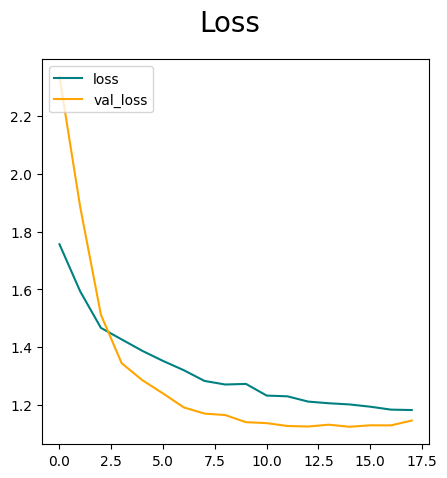

In [551]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

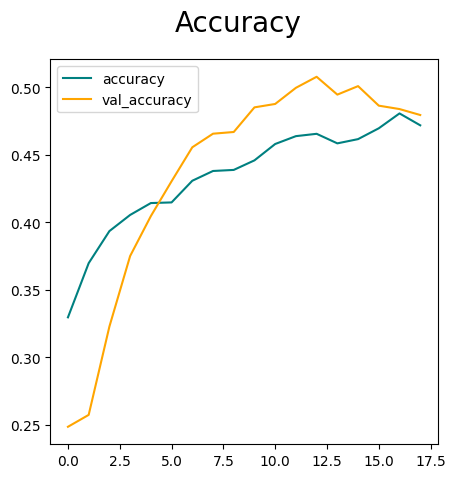

In [552]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [553]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

labels = encoder.classes_

cr = classification_report(np.argmax(y_test, axis=1), y_pred, target_names = labels)
print(cr)

              precision    recall  f1-score   support

           A       0.34      0.52      0.41       375
           B       0.27      0.08      0.13       377
           C       0.60      0.47      0.52       391
           D       0.60      0.79      0.68       446

    accuracy                           0.48      1589
   macro avg       0.45      0.47      0.44      1589
weighted avg       0.46      0.48      0.45      1589



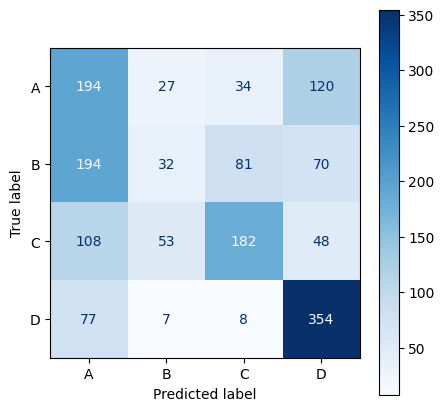

In [554]:
#displaying confusion matrix using ConfusionMatrixDisplay
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

# Using Feature Engineering

In [555]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,0,4.0,3,D
1,0,1,38,1,2,1.0,1,3.0,3,A
2,0,1,67,1,2,1.0,0,1.0,5,B
3,1,1,67,1,7,0.0,2,2.0,5,B
4,0,1,40,1,3,1.0,2,6.0,5,A


In [556]:
df['Age'].max()

89

In [557]:
df['Age'].min()

18

In [566]:
#binning & bucketting
df['Age_Group'] = pd.cut(df['Age'], bins=[15, 30, 40, 50, 60, 70, 80, 90], labels=['15-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

In [567]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group
0,1,0,22,0,5,1.0,0,4.0,3,D,15-29
1,0,1,38,1,2,1.0,1,3.0,3,A,30-39
2,0,1,67,1,2,1.0,0,1.0,5,B,60-69
3,1,1,67,1,7,0.0,2,2.0,5,B,60-69
4,0,1,40,1,3,1.0,2,6.0,5,A,30-39


In [571]:
# label encode the column
df['Age_Group'] = encoder.fit_transform(df['Age_Group'].values)

In [572]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group
0,1,0,22,0,5,1.0,0,4.0,3,D,0
1,0,1,38,1,2,1.0,1,3.0,3,A,1
2,0,1,67,1,2,1.0,0,1.0,5,B,4
3,1,1,67,1,7,0.0,2,2.0,5,B,4
4,0,1,40,1,3,1.0,2,6.0,5,A,1


In [574]:
new_df = df.drop(columns=['Age'])

In [575]:
new_df.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group
0,1,0,0,5,1.0,0,4.0,3,D,0
1,0,1,1,2,1.0,1,3.0,3,A,1
2,0,1,1,2,1.0,0,1.0,5,B,4
3,1,1,1,7,0.0,2,2.0,5,B,4
4,0,1,1,3,1.0,2,6.0,5,A,1


In [576]:
# split new data for training
fea = new_df.drop(columns=['Segmentation'])
tar = new_df['Segmentation']

In [577]:
tar = encoder.fit_transform(tar)
#num_classes = len(encoder.classes_)
tar_encoded = to_categorical(tar, num_classes=num_classes)

In [578]:
# Split the data into training and testing sets
NX_train, NX_test, Ny_train, Ny_test = train_test_split(fea, tar_encoded, test_size=0.2, random_state=42)

In [579]:
# Create the Nmodel
Nmodel = Sequential()

Nmodel.add(Dense(64, activation='relu', input_shape=(NX_train.shape[1],)))
Nmodel.add(BatchNormalization())
Nmodel.add(Dropout(0.3))

Nmodel.add(Dense(32, activation='relu'))
Nmodel.add(BatchNormalization())
Nmodel.add(Dropout(0.3))

Nmodel.add(Dense(num_classes, activation='softmax'))

In [580]:
# Compile the Nmodel
Nmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [581]:
# Train the model
#epc = 100

Nhistory = Nmodel.fit(NX_train, Ny_train, epochs=epc, batch_size=300, validation_data=(NX_test, Ny_test), callbacks=callbacks)

Epoch 1/100
22/22 [==============================] - 2s 24ms/step - loss: 1.6423 - accuracy: 0.3427 - val_loss: 1.2679 - val_accuracy: 0.3927
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 1.3216 - accuracy: 0.4234 - val_loss: 1.2525 - val_accuracy: 0.4047
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 1.2474 - accuracy: 0.4461 - val_loss: 1.2189 - val_accuracy: 0.4216
Epoch 4/100
22/22 [==============================] - 0s 12ms/step - loss: 1.2134 - accuracy: 0.4579 - val_loss: 1.2029 - val_accuracy: 0.4349
Epoch 5/100
22/22 [==============================] - 0s 10ms/step - loss: 1.1869 - accuracy: 0.4724 - val_loss: 1.1860 - val_accuracy: 0.4506
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 1.1854 - accuracy: 0.4719 - val_loss: 1.1788 - val_accuracy: 0.4676
Epoch 7/100
22/22 [==============================] - 0s 10ms/step - loss: 1.1717 - accuracy: 0.4776 - val_loss: 1.1581 - val_accuracy: 0.4947
Epoch 8/

In [582]:
# Evaluate the model
Ny_pred = np.argmax(Nmodel.predict(NX_test), axis=1)

# Calculate accuracy and f1-score
Naccuracy = accuracy_score(np.argmax(Ny_test, axis=1), Ny_pred)
Nf1 = f1_score(np.argmax(Ny_test, axis=1), Ny_pred, average='weighted')  # 'macro' to 'micro' or 'weighted'

print("Accuracy:", Naccuracy)
print("F1 Score:", Nf1)

Accuracy: 0.5185651353052234
F1 Score: 0.5002204722735084


- a bit improving using feature engineering (binning/buckecting)

# Using ML

In [613]:
# split new data
xx = df.drop(columns=['Segmentation'])
yy = df['Segmentation']

In [614]:
yy = encoder.fit_transform(yy)

In [615]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

In [616]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [617]:
#creating pipeline for each model
pipelines = [
    ("MMS + LR", Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression())])),
    ('SS + LR', Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])),
    ('MMS + RF', Pipeline([('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])),
    ('SS + RF', Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])),
    ('MMS + GB', Pipeline([('scaler', MinMaxScaler()), ('gb', GradientBoostingClassifier())])),
    ('SS + GB', Pipeline([('scaler', StandardScaler()), ('gb', GradientBoostingClassifier())])),
]

In [618]:
#Training all the pipelines
for name, pipe in pipelines:
    print(f"Training {name} pipeline")
    pipe.fit(Xx_train, yy_train)

Training MMS + LR pipeline
Training SS + LR pipeline
Training MMS + RF pipeline
Training SS + RF pipeline
Training MMS + GB pipeline
Training SS + GB pipeline


In [619]:
#model evaluation
pipe_dict = {}

#initialising best score to 0
best_score = 0.0

#instantiating an empty string to store the name of the best model
best_pipe = ''

#looping over each pipeline to evaluate them
for name, pipe in pipelines:
    yy_pred = pipe.predict(Xx_test)

    pipe_dict[name] = [accuracy_score(yy_test, yy_pred), f1_score(yy_test, yy_pred, average = 'weighted')]
    
    if pipe.score(Xx_test, yy_test) > best_score:
        best_score = pipe.score(Xx_test, yy_test)
        best_pipe = name

print(f"The best model is {best_pipe} with an accuracy of {best_score}")

The best model is MMS + GB with an accuracy of 0.5280050346129641


In [620]:
# select best model (Model Name = model_ml)
name_ml, model_ml = pipelines[4]

print(name_ml)
print(model_ml)

MMS + GB
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('gb', GradientBoostingClassifier())])


In [621]:
value_to_label = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Map values to labels
lab = [value_to_label[value] for value in (np.unique(yy))]

crr = classification_report(yy_test, yy_pred, target_names = lab)
print(crr)

              precision    recall  f1-score   support

           A       0.42      0.43      0.42       375
           B       0.41      0.33      0.37       377
           C       0.59      0.59      0.59       391
           D       0.63      0.72      0.67       446

    accuracy                           0.53      1589
   macro avg       0.51      0.52      0.51      1589
weighted avg       0.52      0.53      0.52      1589



- slight improve using ML from feature engineering

# Conclusion based on the Models used

- accuracy ->  DL -> 60%
- Options: Machine Learning - >65%?
- comparison and conclusion - explain why ML perform better in this case (inference) - mathematically sound inference 

1. accuracy achieved:
- DL = 0.47
- DL(feature engineering) = 0.51
- ML = 0.53

2. Using Machine Learning (ML) have the highest accuracy compare to DeepLearning (DL) because one of it is about the Data Size, ML tends to perform better for smaller dataset, while DL need to have large dataset to perform well.

3. Proven that using Feature Engineering could have better results eg. accuracy

4. In terms of model complexity, DL more complex compare to ML so that ML can perform better using this dataset I guess

# Save Model

In [623]:
# save model DL
model.save(os.path.join('models', 'model.h5'))

# save model DL feature engineering
Nmodel.save(os.path.join('models', 'Nmodel.h5'))

# save model ML
import pickle

with open('model_ml.pkl', 'wb') as file:
    pickle.dump(model_ml, file)


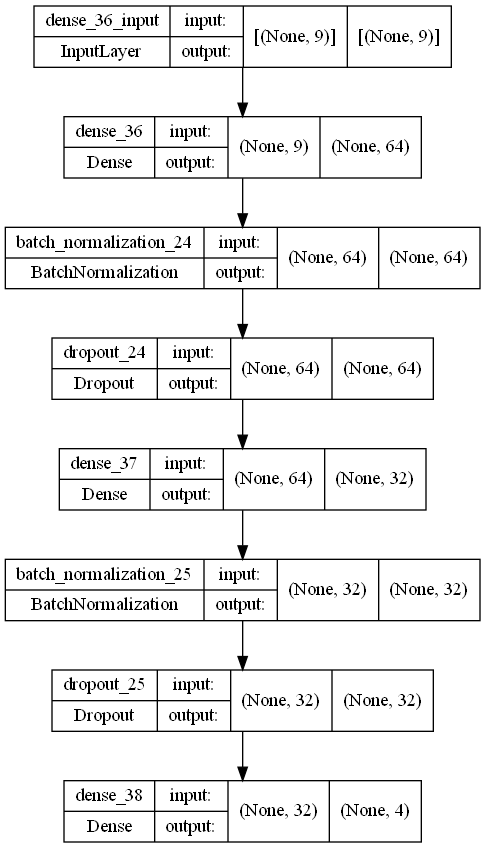

In [627]:
# save model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True)
# plot_model(Nmodel, to_file='Nmodel_architecture.png', show_shapes=True)

# test data

In [437]:
TEST_PATH = os.path.join(PATH, 'new_customers.csv')

df_test = pd.read_csv(TEST_PATH)

In [438]:
df_test.isna().sum()

ID                    0
Gender                0
Ever_Married         50
Age                   0
Graduated            24
Profession           38
Work_Experience     269
Spending_Score        0
Family_Size         113
Var_1                32
Segmentation       2627
dtype: int64

In [ ]:
# load model
# from tensorflow.keras.models import load_model
# load_model = load_model('./models/model.h5')